Based on [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition)

> ## Import dependencies

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['database.sqlite', 'Iris.csv']


## NumPy examples

In [101]:
# examples from NumPy
row_vector = np.array([1, 2, 3])
row_vector

array([1, 2, 3])

Reshaping one-dimensional array into a two-dimensional one. All three approaches create views, not copies, of the `row_vector` array:

In [102]:
column_vector = np.array([1, 2, 3]).reshape(-1, 1)
column_vector

array([[1],
       [2],
       [3]])

In [103]:
row_vector[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [104]:
row_vector[:, None]

array([[1],
       [2],
       [3]])

### Matrix multiplication

Number of columns of the left matrix must match the number of rows of the matrix to the right.

$ \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \times \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 14 \\ 32 \end{bmatrix} $

In [105]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
column_vector = np.array([1, 2, 3]).reshape(-1, 1)
np.matmul(matrix, column_vector)

array([[14],
       [32]])

In [106]:
np.dot(matrix, column_vector)

array([[14],
       [32]])

However, if we are working with matrices and vectors, NumPy can
be quite forgiving if the dimensions of matrices and one-dimensional ar- rays do not match exactly – thanks to broadcasting. The following example yields the same result as the matrix-column vector multiplication, except that it returns a one-dimensional array instead of a two-dimensional one:

In [107]:
np.matmul(matrix, row_vector)

array([14, 32])

In [108]:
np.dot(matrix, row_vector)

array([14, 32])

### Dot-product of vectors (vector norm):

In [109]:
np.matmul(row_vector, row_vector)

14

In [110]:
np.dot(row_vector, row_vector)

14

### Multiplying matrices

In [111]:
matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [112]:
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

$ \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \times \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} = \begin{bmatrix} 14 & 32 \\ 32 & 77 \end{bmatrix} $

In [113]:
np.dot(matrix, matrix.T)

array([[14, 32],
       [32, 77]])

### Set operations in NumPy

A set is essentially a collection of unique elements. Given an array, we can generate such a "set" using the `np.unique` function.

In [114]:
ary = np.array([1, 1, 2, 3, 1, 5])
ary_set = np.unique(ary)
ary_set

array([1, 2, 3, 5])

In [115]:
ary1 = np.array([1, 2, 3])
ary2 = np.array([3, 4, 5, 6])
np.intersect1d(ary1, ary2, assume_unique=True)

array([3])

In [116]:
np.setdiff1d(ary1, ary2, assume_unique=True)

array([1, 2])

In [117]:
np.union1d(ary1, ary2)

array([1, 2, 3, 4, 5, 6])

## Read data from Iris dataset

In [118]:
df = pd.read_csv('../input/Iris.csv').drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis (EDA)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [120]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

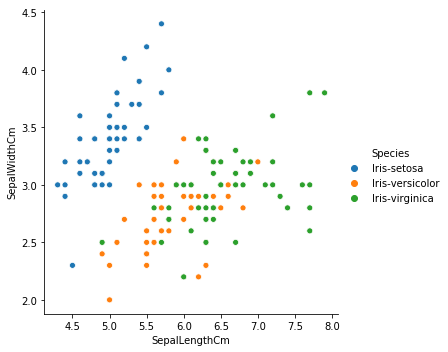

In [121]:
sns.relplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

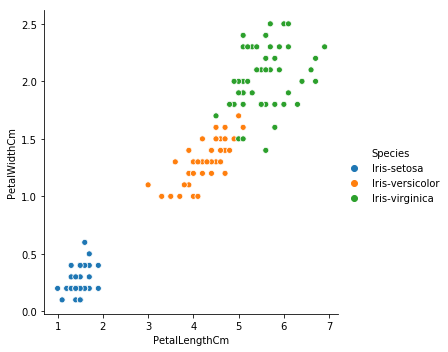

In [122]:
sns.relplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

## Feature selection

$\newcommand{\R}{\mathbb{R}}$
The Iris dataset consists of 150 samples and 4 features and thus can be rewritten as a $150 \times 4$ matrix $\boldsymbol{X} \in \R ^{150 \times 4}$. Subscript $x_i$ refers to the dimension, superscript $x^{(j)}$ refers to training sample, so $x_1^{(150)}$ refers to the $1^{st}$ dimension of flower sample $150$. 

Each row in the feature matrix represents one flower instance rewritten as a 4-dimensional row vector $\boldsymbol{x}^{(i)} \in \R^{1x4}$. 

$ x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)} \end{bmatrix}$ 

Each feature dimension is a 150-dimensional column vector $\boldsymbol{x_j} \in \R ^{150 \times 1}$

$ \begin{bmatrix} x_j^{(1)} \\ x_j^{(2)} \\ \vdots \\ x_j^{(150)} \end{bmatrix} $

The whole dataset can then be summarized in the matrix of the following form:

$ \begin{bmatrix} 
x_1^{(1)} & x_2^{(1)} & x_3^{(1)} & x_4^{(1)} \\
x_1^{(2)} & x_2^{(2)} & x_3^{(2)} & x_4^{(2)} \\
\vdots & \vdots & \vdots & \vdots \\
x_1^{(150)} & x_2^{(150)} & x_3^{(150)} & x_4^{(150)}
\end{bmatrix} $

## Perceptron classifier algorithm

Based on [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition):

An important pioneering neural network was developed based on the first concept for the perceptron learning rule that was introduced by [Frank Rosenblatt in 1957](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf), based in turn on the MCP artificial neuron model introduced by [McCulloch and Pitts in 1943](http://www.mind.ilstu.edu/curriculum/modOverview.php?modGUI=212). The core idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't.

With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a nueron fires or not. In the context of supervised learning and classification, such an algorithm can be used to predict if a sample belongs to one class or the other.

If we refer to two classes as 1 (positive class) and -1 (negative class), we can define a decision function $\phi(z)$ that takes a linear combination of certain input values $\boldsymbol{x}$ and a corresponding weight factor $\boldsymbol{w}$, where $z$ is the so-called **net input**:

$ z = w_1 x_1 + \dots + w_m x_m $

If the net input of a particular sample $x^{(i)}$ is greater than a defined threshold $\theta$, we predict class 1, and class -1 otherwise. Decision function $\phi(\cdot)$ in the perceptron algorithm is a variant of a unit step function:

$ 
\phi(z) = 
\left\{
\begin{array}{ll}
      1 & if~z \geq \theta \\
      -1 & otherwise
\end{array} 
\right. $ 

For simplicity, we can bring the threshold $\theta$ to the left side of the equation and define a weight-zero as $w_0=-\theta$ and $x_0=1$, so that we can write net input $z$ in a more compact form by using a vector dot product of input vector $\boldsymbol{x}$ and the transposed vector of weights $\boldsymbol{w}^T$ (column vector turned into a row vector):

$ z = w_0 x_0 + w_1 x_1 + \dots + w_m x_m = \sum \limits_{j=0}^m x_j w_j = \boldsymbol{w}^T \boldsymbol{x} $

And for the decision function:

$ \phi (z) = \left\{ \begin{array}{ll} 1 & if ~ z \geq 0 \\ -1 & otherwise \end{array} \right.$

In machine learning literature, the negative threshold, or weight, $w_0=-\theta$ is usually called the **bias unit**.

Weights are initialized to 0 or small random numbers, and for each training sample $x^{(i)}$, after the output value $\hat{y}$ is computed, each weight $w_j$ can be updated proportional to input value $x_j$ (all the weights in the weight vector are being updated simultaneously) as:

$\Delta w_j = \eta (y^{(i)} - \hat{y} ^{(i)} ) x_j^{(i)}$

where $\eta$ is the **learning rate** (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the true class label of the $i^{th}$ training sample, and $\hat{y}^{(i)}$ is the predicted class label.

In the case of a correct prediction, $y^{(i)} - \hat{y}^{(i)}=0$ and the weights remain the same. However, in the case of a wrong prediction, the weights are being pushed towards the direction of the positive or negative target class with correction values of $\Delta w_j = \eta(2)x_j^{(i)}$ or $\eta(-2)x_j^{(i)}$.

It is important to note that **convergence of the perceptron is only guaranteed if the two classes are linearly separable** and the **learning rate is sufficiently small**. If the two classes cannot be separated by a linear decision boundary, the perceptron would never stop updating the weights, so either the maximum number of passes over the training dataset _(epochs)_ and/or a threshold for the number of tolerated misclassifications must be set.

### Implementing Perceptron learning algorithm in Python

Defining a perceptron algorithm as a Python class (from [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition)).

As a convention, we append an underscore `_` to attributes that are not being created upon the initialization of the object but by calling the object's other methods, for example, `self.w_`.

In [123]:
class Perceptron(object):
    """
    Perceptron classifier

    Parameters
    ----------
    eta : float
      Learning rate (between 0.0 and 1.0).
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_ : 1-d array
      Weights after fitting.
    errors_ : list
      Number of mis-classifications (updates) in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples
          and n_features is the number of features.
        y : {array-like}, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Using this perceptron implementation, we can now initialize new `Perceptron` objects with a given learning rate `eta` and `n_iter`, which is the number of epochs (passes over the training set). Via the `fit` method, we initialize the weights in `self.w_` to a vector $\R^{m+1}$, where $m$ stands for the number of dimensions (features) in the dataset, where we add 1 for the first element in this vector that represents the bias unit (first element in the vector self.w_[0]).

Also notice that this vector contains small random numbers drawn from a normal distribution with standard deviation `0.01` via `rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])`, where `rgen` is a NumPy random number generator that we seeded with a user-specified random seed so that we can reproduce previous results if desired.

After the weights have been initialized, the `fit` method loops over all individual samples in the training set and updates the weights according to the perceptron learning rule that we discussed in the previous section. The class labels are predicted by the `predict` method, which is called in the `fit` method to predict the class label for the weight update, but `predict` can also be used to predict the class labels of new data after we have fitted our model. Furthermore, we also collect the number of misclassifications during each epoch in the `self.errors_` list so that we can later analyze how well our perceptron performed during the training. The `np.dot` function that is used in the `net_input` method simply calculates the vector dot product $\boldsymbol{w}^T \boldsymbol{x}$.

### Training a Perceptron model on the Iris dataset

In this case, only two flower classes _Setosa_ and _Versicolor_ will be loaded from the Iris dataset, even through the perceptron algorithm can be extended to multi-class classification, for example by using the _One-versus-All (OvA)_ or _One-versus-Rest (OvR)_ technique). Features considered will be restricted to _sepal length_ and _petal length_ for visualization purposes, even though perceptron rule is not restricted to 2 dimensions.

We extract the first 100 class labels that correspond to the 50 `Iris-setosa` and 50 `Iris-versicolor` flowers, and convert the class labels into the two integer class labels `1` (`versicolor`) and `-1` (`setosa`) that we assign to a vector `y`, where the values method of a pandas `DataFrame` yields the corresponding NumPy representation.

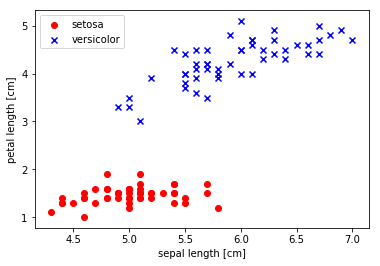

In [124]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

The preceding scatterplot shows the distribution of flower samples in the Iris dataset along the two feature axes, petal length and sepal length. In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate Setosa from Versicolor flowers. Thus, a linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly.

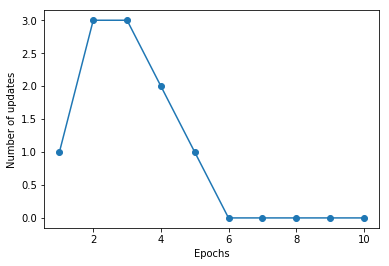

In [125]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Convenience function to visualize decision boundaries for two-dimensional datasets.

First, we define a number of `colors` and `markers` and create a colormap from the list of colors via `ListedColormap`. Then, we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays `xx1` and `xx2` via the NumPy `meshgrid` function. Since we trained our perceptron classifier on two feature dimensions, we need to flatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset so that we can use the `predict` method to predict the class labels `Z` of the corresponding grid points.

After reshaping the predicted class labels Z into a grid with the same dimensions as xx1 and xx2, we can now draw a contour plot via Matplotlib's contourf function, which maps the different decision regions to different colors for each predicted class in the grid array.

In [126]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

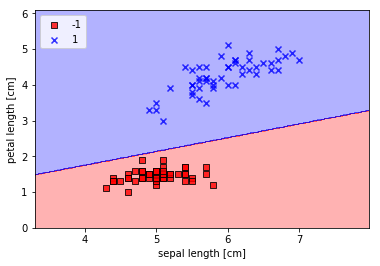

In [127]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron. Frank Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs.

## ADAptive LInear NEurons (Adaline)

Based on [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition):

Adaline was published by Bernard Widrow and his doctoral student Tedd Hoff, only a few years after Frank Rosenblatt's perceptron algorithm, and can be considered as an improvement on the latter. (Refer to An Adaptive "Adaline" Neuron Using Chemical "Memistors", Technical Report Number 1553-2, B. Widrow and others, Stanford Electron Labs, Stanford, CA, October 1960).

The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous cost functions. This lays the groundwork for understanding more advanced machine learning algorithms for classification.

The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron. In Adaline, this linear activation function $\phi (z) $ is simply the identity function of the net input, so that:

$ \phi (\boldsymbol{w}^T \boldsymbol{x}) = \boldsymbol{w}^T \boldsymbol{x} $

While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction, which is similar to the unit step function that we have seen earlier. The main difference between the perceptron and Adaline algorithm is that the Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels.

### Minimizing cost functions with gradient descent

One of the key ingredients of supervised machine learning algorithms is a defined **objective function** that is to be optimized during the learning process. This objective function is often a cost function that we want to minimize. In the case of Adaline, we can define the cost function $J$ to learn the weights as the _Sum of Squared Errors (SSE)_ between the calculated outcome and the true class label:

$J(w) = \frac{1} {2} \sum_i \left(y^{(i)} - \phi \left( z^{(i)} \right) \right)^2 $

The term $\frac{1} {2}$ is just added for our convenience, which will make it easier to derive the gradient, as we will see in the following paragraphs. The main advantage of this _continuous_ linear activation function, in contrast to the unit step function, is that the cost function becomes _differentiable_. Another nice property of this cost function is that it is _convex_; thus, we can use a simple yet powerful optimization algorithm called **gradient descent** to find the weights that minimize our cost function to classify the samples in the Iris dataset. 

We can describe the main idea behind gradient descent as _climbing down a hill_ until a local or _global cost minimum_ is reached. In each iteration, we take a step in the opposite direction of the gradient where the step size is determined by the value of the learning rate, as well as the slope of the gradient.

Using gradient descent, we can now update the weights by taking a step in the opposite direction of the gradient $\nabla J(\boldsymbol{w})$ of our cost function $J(\boldsymbol{w})$:

$\boldsymbol{w} ~+=~ \Delta \boldsymbol{w}$

Where the weight change $\Delta \boldsymbol{w}$ is defined as the negative gradient multiplied by the learning rate $\eta$:

$\Delta \boldsymbol{w} = - \eta \nabla J ( \boldsymbol{w} ) $

To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight $\boldsymbol{w}_j$:

$ \large{ \frac{ \partial{J} } { \partial{\boldsymbol{w}_j} } = 
\frac{ \partial } { \partial{w_j} } \frac{1} {2} \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right)^2 =
\frac{1} {2} \frac{ \partial } { \partial{w_j} } \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right)^2 =
\frac{1} {2} \sum \limits_i 2 \left(y^{(i)} - \phi \left( z^{(i)} \right) \right) \frac{ \partial } { \partial{w_j} } \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) = 
\sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) \frac{ \partial } { \partial{w_j} } \left( y^{(i)} - \sum \limits_i \left( w_j^{(i)} x_j^{(i)} \right) \right) = 
\sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) \left( -x_j^{(i)} \right) = 
- \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x_j^{(i)} } $

So that we can write the update of weight $w_j$ as (all weights are updated simultaneously):

$ \large{ \Delta w_j = - \eta \frac{ \partial{J} } { \partial{w_j} } = \eta \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x_j^{(i)} } $

Although the Adaline learning rule looks identical to the perceptron rule, we should note that the $\phi\left(z^{(i)}\right)$  **is a real number and not an integer class label**. Furthermore, the **weight update is calculated based on all samples in the training set** (instead of updating the weights incrementally after each sample), which is why this approach is also referred to as **batch gradient descent**. It **minimizes a cost function by taking a step in the opposite direction of a cost gradient** that is **calculated from the whole training set**.

### Implementing Adaline learning algorithm in Python

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition)).

Since the perceptron rule and Adaline are very similar, we will take the perceptron implementation that we defined earlier and change the `fit` method so that the weights are updated by minimizing the cost function via gradient descent:

In [128]:
class AdalineGD(object):
    """ ADAptive LInear NEurons (Adaline) classifier

    Parameters
    ----------
    eta : float
      Learning rate (between 0.0 and 1.0).
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    ----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-Squares (SSE) cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples
          and n_features is the number of features.
        y: {array_like}, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Compute linear activation """
        return X

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Instead of updating the weights after evaluating each individual training sample, as in the perceptron, we calculate the gradient based on the whole training dataset via `self.eta * errors.sum()` for the bias unit (zero-weight) and via `self.eta * X.T.dot(errors)` for the weights 1 to m where `X.T.dot(errors)` is a matrix-vector multiplication between our feature matrix and the error vector.

Please note that the `activation` method has _no effect in the code_ since it is _simply an identity function_. Here, we added the activation function (computed via the `activation` method) to illustrate how information flows through a single layer neural network: features from the input data, net input, activation, and output. In the next chapter, we will learn about a logistic regression classifier that uses a non-identity, nonlinear activation function. We will see that a logistic regression model is closely related to Adaline with the only difference being its activation and cost function.

Now, similar to the previous perceptron implementation, we collect the cost values in a `self.cost_` list to check whether the algorithm converged after training.

In practice, it often requires some experimentation to find a good learning rate $\eta$ for optimal convergence. So, let's choose two different learning rates, $\eta=0.01$ and $\eta=0.0001$, to start with and plot the cost functions versus the number of epochs to see how well the Adaline implementation learns from the training data.

The **learning rate** $\eta$ (`eta`), as well as the **number of epochs** (`n_iter`), are the so-called **hyperparameters** of the perceptron and Adaline learning algorithms.

Let us now plot the cost against the number of epochs for the two different learning rates:

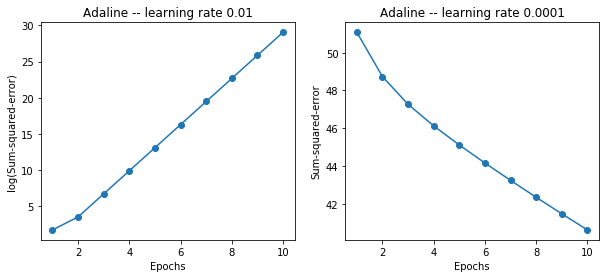

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title("Adaline -- learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squared-error")
ax[1].set_title("Adaline -- learning rate 0.0001")

plt.show()

As we can see in the resulting cost-function plots, we encountered two different types of problem. The **left chart** shows what could happen if we choose a **learning rate that is too large**. Instead of minimizing the cost function, the error becomes larger in every epoch, because we **overshoot the global minimum**. On the other hand, we can see that the cost decreases on the **right plot**, but the chosen **learning rate $\eta=0.0001$ is so small** that the algorithm would require a **very large number of epochs to converge** to the global cost minimum:

## Improving gradient descent through feature scaling

Based on [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition):

Many machine learning algorithms require some sort of feature scaling for optimal performance, gradient descent is an algorithm that benefits from it as well. We will use a feature scaling method called **standardization**, which gives our data the property of a standard normal distribution, which helps gradient descent learning to converge more quickly. One of the reasons why standardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution (the global cost minimum). Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1. For instance, to standardize the $j^{th}$ feature, we can simply subtract the sample mean $\mu_j$ from every training sample and divide it by its standard deviation $\sigma_j$:

$ \large{ \boldsymbol{x}'_j = \frac{\boldsymbol{x}_j - \mu_j} {\sigma_j} } $

Here, $\boldsymbol{x}_j$ is a vector consisting of the $j^{th}$ feature values of all training samples $n$, and this standardization technique is applied to each feature $j$ in our dataset.

Standardization can easily be achieved using the built-in NumPy methods `mean` and `std`:

In [130]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

After standardization, we will train Adaline again and see that it now converges after a small number of epochs using a learning rate $\eta=0.01$:

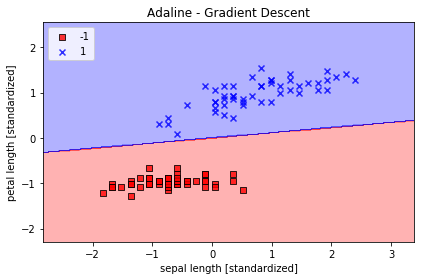

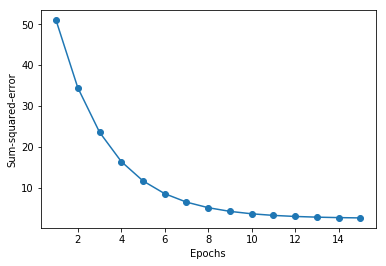

In [131]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

As we can see in the plots, Adaline has now converged after training on the standardized features using a learning rate . However, note that the SSE remains non-zero even though all samples were classified correctly.

## Large-scale machine learning and stochastic gradient descent

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition):

In the previous section, we learned how to minimize a cost function by taking a step in the opposite direction of a cost gradient that is calculated from the whole training set; this is why this approach is sometimes also referred to as **batch gradient descent**. Now imagine we have a very large dataset with millions of data points, which is not uncommon in many machine learning applications. Running batch gradient descent can be computationally quite costly in such scenarios since we need to reevaluate the whole training dataset each time we take one step towards the global minimum.

A popular alternative to the batch gradient descent algorithm is **stochastic gradient descent**, sometimes also called iterative or online gradient descent. Instead of updating the weights based on the sum of the accumulated errors over all samples, we update the weights incrementally for each training sample.

Although stochastic gradient descent can be considered as an approximation of gradient descent, it typically reaches convergence much faster because of the more frequent weight updates. Since each gradient is calculated based on a single training example, the error surface is noisier than in gradient descent, which can also have the advantage that stochastic gradient descent can escape shallow local minima more readily if we are working with nonlinear cost functions. To obtain satisfying results via stochastic gradient descent, it is important to present it training data in a random order; also, we want to shuffle the training set for every epoch to prevent cycles.

Another advantage of stochastic gradient descent is that we can use it for online learning. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for example, customer data in web applications. Using online learning, the system can immediately adapt to changes and the training data can be discarded after updating the model if storage space is an issue.

A compromise between batch gradient descent and stochastic gradient descent is so-called **mini-batch learning**. Mini-batch learning can be understood as applying batch gradient descent to smaller subsets of the training data, for example, 32 samples at a time. The advantage over batch gradient descent is that convergence is reached faster via mini-batches because of the more frequent weight updates. Furthermore, mini-batch learning allows us to replace the `for` loop over the training samples in stochastic gradient descent with vectorized operations, which can further improve the computational efficiency of our learning algorithm.

### Implementing stochastic gradient descent

Since we already implemented the Adaline learning rule using gradient descent, we only need to make a few adjustments to modify the learning algorithm to update the weights via stochastic gradient descent. Inside the `fit` method, we will now update the weights after each training sample. Furthermore, we will implement an additional `partial_fit` method, which does not reinitialize the weights, for online learning. In order to check whether our algorithm converged after training, we will calculate the cost as the average cost of the training samples in each epoch. Furthermore, we will add an option to shuffle the training data before each epoch to avoid repetitive cycles when we are optimizing the cost function; via the `random_state` parameter, we allow the specification of a random seed for reproducibility:

In [132]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True 
      to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, 
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number 
          of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, 
                                   size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) 
                        >= 0.0, 1, -1)

The `_shuffle` method that we are now using in the `AdalineSGD` classifier works as follows: via the `permutation` function in `np.random`, we generate a random sequence of unique numbers in the range 0 to 100. Those numbers can then be used as indices to shuffle our feature matrix and class label vector.

We can then use the `fit` method to train the `AdalineSGD` classifier and use our `plot_decision_regions` to plot our training results:

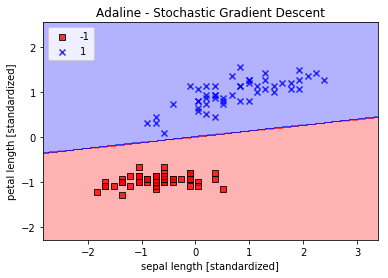

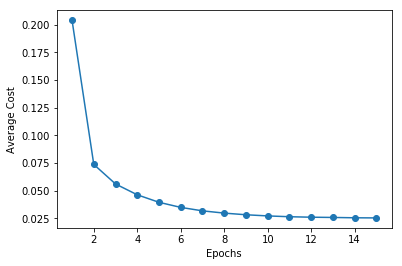

In [133]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

As we can see, the average cost goes down pretty quickly, and the final decision boundary after 15 epochs looks similar to the batch gradient descent Adaline. If we want to update our model, for example, in an online learning scenario with streaming data, we could simply call the `partial_fit` method on individual samples—for instance `ada.partial_fit(X_std[0, :], y[0])`.

## Choosing a classification algorithm

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition).

Choosing an appropriate classification algorithm for a particular problem task requires practice; each algorithm has its own quirks and is based on certain assumptions. To restate the [No Free Lunch theorem by David H. Wolpert](https://ti.arc.nasa.gov/m/profile/dhw/papers/78.pdf), no single classifier works best across all possible scenarios. In practice, it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or samples, the amount of noise in a dataset, and whether the classes are linearly separable or not.

Eventually, the performance of a classifier—computational performance as well as predictive power—depends heavily on the underlying data that is available for learning. The five main steps that are involved in training a machine learning algorithm can be summarized as follows:

1. Selecting features and collecting training samples.

2. Choosing a performance metric.

3. Choosing a classifier and optimization algorithm.

4. Evaluating the performance of the model.

5. Tuning the algorithm.

`Scikit-learn` API in Python combines a user-friendly interface with a highly optimized implementation of several classification algorithms. The `scikit-learn` library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models.

### Perceptron in `scikit-learn`

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition).

In [134]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris['target']
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


The `np.unique(y)` function returned the three unique class labels stored in `iris.target`, and as we see, the Iris flower class names `Iris-setosa`, `Iris-versicolor`, and `Iris-virginica` are already stored as integers (here: `0`, `1`, `2`). Although many scikit-learn functions and class methods also work with class labels in string format, **using integer labels is a recommended approach to avoid technical glitches and improve computational performance** due to a smaller memory footprint; furthermore, encoding class labels as integers is a common convention among most machine learning libraries.

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets.

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=1, stratify=y)

Using the `train_test_split` function from scikit-learn's `model_selection` module, we randomly split the `X` and `y` arrays into 30 percent test data (45 samples) and 70 percent training data (105 samples).

Note that the `train_test_split` function already shuffles the training sets internally before splitting; otherwise, all class `0` and class `1` samples would have ended up in the training set, and the test set would consist of 45 samples from class 2. Via the `random_state` parameter, we provided a fixed random seed (`random_state=1`) for the internal pseudo-random number generator that is used for shuffling the datasets prior to splitting. Using such a fixed `random_state` ensures that our results are reproducible.

Lastly, we took advantage of the built-in support for stratification via `stratify=y`. In this context, stratification means that the `train_test_split` method returns training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy's `bincount` function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [136]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


We will standardize the features using the `StandardScaler` class from scikit-learn's `preprocessing` module:

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Using the preceding code, we loaded the `StandardScaler` class from the `preprocessing` module and initialized a new `StandardScaler` object that we assigned to the `sc` variable. Using the `fit` method, `StandardScaler` estimated the parameters `μ` (sample mean) and `σ` (standard deviation) for each feature dimension from the training data. By calling the `transform` method, we then standardized the training data using those estimated parameters $\mu$ and $\sigma$. Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

Having standardized the training data, we can now train a perceptron model. Most algorithms in scikit-learn already support multiclass classification by default via the One-versus-Rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once. The code is as follows:

In [138]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=100, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

After loading the `Perceptron` class from the `linear_model` module, we initialized a new `Perceptron` object and trained the model via the `fit` method. Here, the model parameter `eta0` is equivalent to the learning rate `eta` that we used in our own perceptron implementation, and the `max_iter` parameter defines the number of epochs (passes over the training set).

Finding an appropriate learning rate requires some experimentation. If the learning rate is too large, the algorithm will overshoot the global cost minimum. If the learning rate is too small, the algorithm requires more epochs until convergence, which can make the learning slow—especially for large datasets. Also, we used the `random_state` parameter to ensure the reproducibility of the initial shuffling of the training dataset after each epoch.

Having trained a model in scikit-learn, we can make predictions via the predict method:

In [139]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


#### Errors on test set (%)

Executing the code, we see that the perceptron misclassifies 3 out of the 45 flower samples. Thus, the misclassification error on the test dataset is approximately 0.067 or 6.7%.

In [140]:
3 / 45

0.06666666666666667

#### Accuracy on test set (%)

Instead of the misclassification error, many machine learning practitioners report the classification accuracy of a model, which is simply calculated as follows:

$ Accuracy =  1 - error$

In [141]:
1 - 3 / 45

0.9333333333333333

The scikit-learn library also implements a large variety of different performance metrics that are available via the `metrics` module. For example, we can calculate the classification accuracy of the perceptron on the test set as follows:

In [142]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


Here, `y_test` are the true class labels and `y_pred` are the class labels that we predicted previously. Alternatively, each classifier in scikit-learn has a score method, which computes a classifier's prediction accuracy by combining the predict call with accuracy_score as shown here:

In [143]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


Finally, we can use our `plot_decision_regions` function to plot the decision regions of our newly trained perceptron model and visualize how well it separates the different flower samples. However, let's add a small modification to highlight the samples from the test dataset via small circles:

In [144]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None,  
                          resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

With the slight modification that we made to the `plot_decision_regions` function, we can now specify the indices of the samples that we want to mark on the resulting plots. The code is as follows:

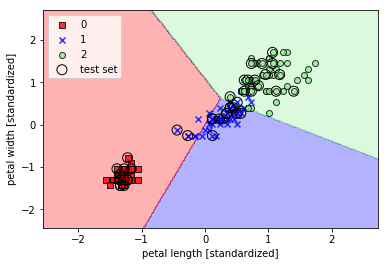

In [145]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

As we can see in the resulting plot, the three flower classes cannot be perfectly separated by a linear decision boundary. Perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.

## Modeling class probabilities via logistic regression

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition).

Although the perceptron rule offers a nice and easygoing introduction to machine learning algorithms for classification, its biggest disadvantage is that it never converges if the classes are not perfectly linearly separable. The classification task in the previous section would be an example of such a scenario. Intuitively, we can think of the reason as the weights are continuously being updated since there is always at least one misclassified sample present in each epoch. Of course, you can change the learning rate and increase the number of epochs, but be warned that the perceptron will never converge on this dataset. To make better use of our time, we will now take a look at another simple yet more powerful algorithm for linear and binary classification problems: logistic regression. Note that, **in spite of its name, logistic regression is a model for classification, not regression**.

Logistic regression is a classification model that is very easy to implement but performs very well on linearly separable classes. It is **one of the most widely used algorithms for classification in industry**. Similar to the perceptron and Adaline, the logistic regression model in this chapter is **also a linear model for binary classification that can be extended to multiclass classification**, for example, via the _OvR technique_.

To explain the idea behind logistic regression as a probabilistic model, let's first introduce the _odds ratio_: the odds in favor of a particular event. The odds ratio can be written as $\large{\frac{p} {1-p}}$ where $\large{p}$ stands for the probability of the positive event. The term **positive event** does not necessarily mean good, but refers to the **event that we want to predict**, for example, the probability that a patient has a certain disease; we can think of the positive event as class label $\large{y=1}$. We can then further define the **logit function**, which is simply the **logarithm of the odds ratio (log-odds):**

$ \large{ \text{logit}(p)=\log \frac{p} {1-p} } $

Note that `log` refers to the **natural logarithm**, as it is the common convention in computer science. The logit function takes as input values in the range 0 to 1 and transforms them to values over the entire real-number range, which we can use to express a linear relationship between feature values and the log-odds:

$ \large{ \text{logit} \left( p \left( y=1|\boldsymbol{x} \right) \right) = 
w_0 x_0 + w_1 x_1 + \dots + w_m x_m = \sum \limits_{i=0}^m w_i x_i = \boldsymbol{w}^T \boldsymbol{x} } $

Here, $\large{p(y=1|\boldsymbol{x})}$ is the conditional probability that a particular sample belongs to class `1` given its features $\boldsymbol{x}$.

Now, we are actually interested in predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the `logit` function. It is also called **logistic sigmoid function**, sometimes simply abbreviated to **sigmoid function** due to its characteristic S-shape:

$ \large{ \phi(z) = \frac{1} {1 + e^{-z}} } $

Here z is the net input, the linear combination of weights and sample features, $z = \boldsymbol{w}^T \boldsymbol{x} = w_0 x_0 + w_1 x_1 + \dots + w_m x_m$. $w_0$ refers to the bias unit, and is an additional input value that we provide $x_0$, which is set equal to 1.

Now let us simply plot the sigmoid function for some values in the range -7 to 7 to see how it looks:

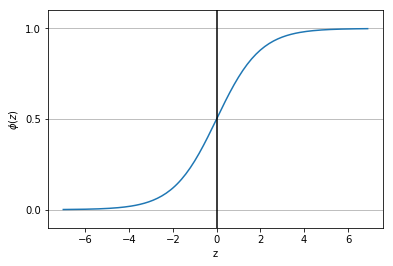

In [146]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

We can see that $\phi(z)$ approaches 1 if z goes towards infinity ($z \to \infty$) since $e^{-z}$ becomes very small for large values of $z$. Similarly, $\phi(z)$ goes towards 0 for $z \to - \infty$ as a result of an increasingly large denominator. Thus, we conclude that this sigmoid function takes real number values as input and transforms them into values in the range `[0, 1]` with an intercept at $\phi(z)=0.5$.

In Adaline, we used the identity function $\phi(z)=z$ as the activation function. In logistic regression, this activation function simply becomes the sigmoid function that we defined earlier. 

The output of the sigmoid function is then interpreted as the probability of a particular sample belonging to class `1`, $\phi(z)=P(y=1|\boldsymbol{x}; \boldsymbol{w})$, given its features $\boldsymbol{x}$ parameterized by the weights $\boldsymbol{w}$. For example, if we compute $\phi(z) = 0.8$ for a particular flower sample, it means that the chance that this sample is an Iris-versicolor flower is 80 percent. Therefore, the probability that this flower is an Iris-setosa flower can be calculated as  or 20 percent. The predicted probability can then simply be converted into a binary outcome via a threshold function:

$ 
\hat{y} = 
\left\{
\begin{array}{ll}
      1 & if~\phi (z) \geq 0.5 \\
      0 & otherwise
\end{array} 
\right. $ 

If we look at the preceding plot of the sigmoid function, this is equivalent to the following:

$ 
\hat{y} = 
\left\{
\begin{array}{ll}
      1 & if~z \geq 0.0 \\
      0 & otherwise
\end{array} 
\right. $ 

In fact, there are many applications where we are not only interested in the predicted class labels, but where the estimation of the class-membership probability is particularly useful (the output of the sigmoid function prior to applying the threshold function). Logistic regression is used in weather forecasting, for example, not only to predict if it will rain on a particular day but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys great popularity in the field of medicine.

### Learning the weights of the logistic cost function

Previously, we defined the **sum-squared-error (SSE) cost function** as follows:

$ J(\boldsymbol{w}) = \sum \limits_i \frac{1} {2} \left( \phi \left( z^{(i)} \right) - y^{(i)} \right)^2 $

We minimized this function in order to learn the weights $\boldsymbol{w}$ for our Adaline classification model. To explain how we can derive the cost function for logistic regression, let's first define the **likelihood L** that we want to maximize when we build a logistic regression model, assuming that the individual samples in our dataset are independent of one another. The formula is as follows:

$ L(\boldsymbol{w}) = P(\boldsymbol{y}|\boldsymbol{x}; \boldsymbol{w}) = 
\Pi_{i=1}^n P \left( y^{(i)}|\boldsymbol{x}^{(i)};\boldsymbol{w} \right) = \Pi_{i=1}^n \left( \phi \left( z^{(i)} \right) \right)^{y^{(i)}} \left( 1 - \phi \left( z^{(i)} \right) \right)^{1-y^{(i)}}$

In practice, it is easier to maximize the (natural) log of this equation, which is called the **log-likelihood function:**

$ l(\boldsymbol{w}) = \log L(\boldsymbol{w}) =
\sum \limits_{i=1}^n \left[ y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) + \left(1 - y^{(i)} \right) \log \left( 1 - \phi \left( z^{(i)} \right) \right) \right] $

Firstly, applying the log function reduces the potential for numerical underflow, which can occur if the likelihoods are very small. Secondly, we can convert the product of factors into a summation of factors, which makes it easier to obtain the derivative of this function via the addition trick, as you may remember from calculus.

Now we could use an optimization algorithm such as gradient ascent to maximize this log-likelihood function. Alternatively, let's rewrite the log-likelihood as a cost function $J$ that can be minimized using gradient descent:

$ J(\boldsymbol{w}) = \sum \limits_{i=1}^n \left[ -y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - \phi \left( z^{(i)} \right) \right) \right] $

To get a better grasp of this cost function, let us take a look at the cost that we calculate for one single-sample training instance:

$ J( \phi (z), y; \boldsymbol{w} ) = -y \log( \phi (z) ) - (1-y) \log(1 - \phi(z)) $

Looking at the equation, we can see that the first term becomes zero if $y=0$, and the second term becomes zero if $y=1$:

$ 
J( \phi (z), y; \boldsymbol{w}) = 
\left\{
\begin{array}{ll}
      -log( \phi (z) ) & if~y=1 \\
      -log(1 - \phi(z) ) & if ~ y=0
\end{array} 
\right. $ 

Let's write a short code snippet to create a plot that illustrates the cost of classifying a single-sample instance for different values of $ \phi (z) $:

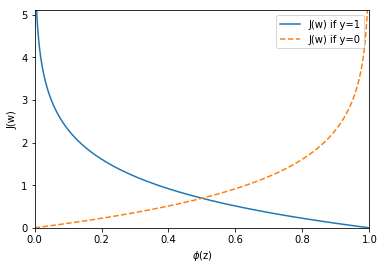

In [147]:
def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

The resulting plot shows the sigmoid activation on the x axis, in the range `0` to `1` (the inputs to the sigmoid function were z values in the range `-10` to `10`) and the associated logistic cost on the y-axis. We can see that the cost approaches 0 (continuous line) if we correctly predict that a sample belongs to class 1. Similarly, we can see on the y-axis that the cost also approaches 0 if we correctly predict $y=0$ (dashed line). However, if the prediction is wrong, the cost goes towards infinity. The main point is that **we penalize wrong predictions with an increasingly larger cost.**

### Converting an Adaline implementation into an algorithm for logistic regression

If we were to implement logistic regression ourselves, we could simply substitute the cost function $J$ in our Adaline implementation with the new cost function:

$ J( \boldsymbol{w} ) = - \sum \limits_i y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) + \left(1 - y^{(i)} \right) \log \left(1 - \phi \left( z^{(i)} \right) \right) $

We use this to compute the cost of classifying all training samples per epoch. Also, we need to swap the linear activation function with the sigmoid activation and change the threshold function to return class labels 0 and 1 instead of -1 and 1. If we make those three changes to the Adaline code, we would end up with a working logistic regression implementation, as shown here:

In [148]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of 
          samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - 
                    ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) 
        #                 >= 0.5, 1, 0)

When we fit a logistic regression model, we have to keep in mind that it only works for binary classification tasks. So, let us consider only `Iris-setosa` and `Iris-versicolor` flowers (classes `0` and `1`) and check that our implementation of logistic regression works:

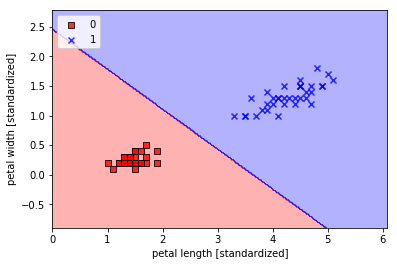

In [149]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, 
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Training a logistic regression model with scikit-learn

We just went through useful coding and math exercises in the previous subsection, which helped illustrate the conceptual differences between Adaline and logistic regression. Now, let's learn how to use scikit-learn's more optimized implementation of logistic regression that also supports multi-class settings off the shelf (_OvR_ by default). In the following code example, we will use the `sklearn.linear_model.LogisticRegression` class as well as the familiar `fit` method to train the model on all three classes in the standardized flower training dataset:

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


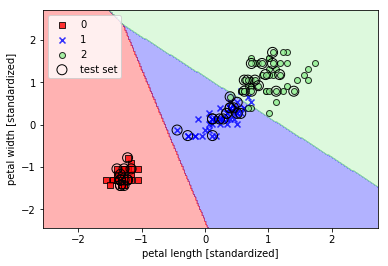

In [150]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, 
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

The probability that training examples belong to a certain class can be computed using the `predict_proba` method. For example, we can predict the probabilities of the first three samples in the test set as follows:



In [151]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

The first row corresponds to the class-membership probabilities of the first flower, the second row corresponds to the class-membership probabilities of the second flower, and so forth. Notice that the columns sum all up to one, as expected (you can confirm this by executing `lr.predict_proba(X_test_std[:3, :]).sum(axis=1))`.

In [152]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

The highest value in the first row is approximately 0.853, which means that the first sample belongs to class three (Iris-virginica) with a predicted probability of 85.7 percent. So, as you may have already noticed, we can get the predicted class labels by identifying the largest column in each row, for example, using NumPy's argmax function:

In [153]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

The returned class indices are shown here (they correspond to `Iris-virginica`, `Iris-setosa`, and `Iris-setosa`).

The class labels we obtained from the preceding conditional probabilities is, of course, just a manual approach to calling the `predict` method directly, which we can quickly verify as follows:

In [154]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

Lastly, a word of caution if you want to predict the class label of a single flower sample: scikit-learn expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy's `reshape` method to add a new dimension, as demonstrated here:

In [155]:
lr.predict(X_test_std[0, :].reshape(1, -1)) 

array([2])

### Tackling overfitting via regularization (bias-variance trade-off)

**Overfitting is a common problem in machine learning**, where a **model performs well on training data but does not generalize well to unseen data (test data).** If a model suffers from overfitting, **we also say that the model has a high variance**, which can be caused by having **too many parameters** that lead to a model that is **too complex** given the underlying data. Similarly, **our model can also suffer from underfitting (high bias)**, which means that our model is **not complex enough** to capture the pattern in the training data well and therefore also suffers from **low performance on unseen data.**

**Variance measures the consistency (or variability) of the model prediction** for a particular sample instance if we were to retrain the model multiple times, for example, on different subsets of the training dataset. We can say that the model is **sensitive to the randomness in the training data**. In contrast, **bias measures how far off the predictions are from the correct values in general** if we rebuild the model multiple times on different training datasets; **bias is the measure of the systematic error** that is not due to randomness.

One way of finding a good bias-variance tradeoff is to **tune the complexity of the model via regularization**. Regularization is a very **useful method to handle collinearity (high correlation among features)**, **filter out noise** from data, and eventually **prevent overfitting**. The concept behind regularization is to **introduce additional information (bias) to penalize extreme parameter (weight) values.** The most common form of regularization is so-called _L2 regularization_ (sometimes also called _L2 shrinkage_ or _weight decay_), which can be written as follows:

$ \large{ \frac{\lambda} {2} ||\boldsymbol{w}||^2 = \frac{\lambda} {2} \sum \limits_{j=1}^m w_j^2 } $

Here, $\lambda$ is the so-called regularization parameter.

Regularization is another reason why feature scaling such as standardization is important. For regularization to work properly, we need to ensure that all our features are on comparable scales.

The cost function for logistic regression can be regularized by adding a simple regularization term, which will shrink the weights during model training:

$ J(\boldsymbol{w}) = \sum \limits_{i=1}^n \left[ -y^{(i)} \log \left( \phi \left( z^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - \phi \left( z^{(i)} \right) \right) \right] + \frac{\lambda} {2} || \boldsymbol{w} || ^2 $

Via the regularization parameter $\lambda$, we can then control how well we fit the training data while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength.

The parameter `C` that is implemented for the `LogisticRegression` class in scikit-learn comes from a convention in support vector machines. The term `C` is directly related to the regularization parameter $\lambda$, which is its inverse. Consequently, decreasing the value of the inverse regularization parameter `C` means that we are increasing the regularization strength, which we can visualize by plotting the _L2-regularization path_ for the two weight coefficients:

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

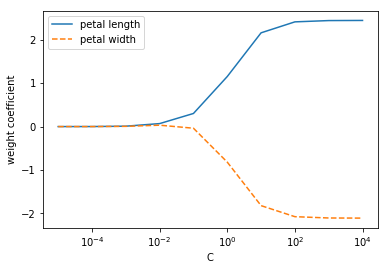

In [156]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
    label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

By executing the preceding code, we fitted ten logistic regression models with different values for the inverse-regularization parameter `C`. For the purposes of illustration, we only collected the weight coefficients of class `1` (here, the second class in the dataset, `Iris-versicolor`) versus all classifiers—remember that we are using the _OvR technique_ for multiclass classification.

As we can see in the resulting plot, the weight coefficients shrink if we decrease parameter `C`, that is, if we increase the regularization strength.

## Maximum margin classification with support vector machines (SVM)

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition).

Another powerful and widely used learning algorithm is the Support Vector Machine (SVM), which can be considered an **extension of the perceptron**. Using the perceptron algorithm, we minimized misclassification errors. However, in SVMs our **optimization objective is to maximize the margin**. The margin is defined as the **distance between the separating hyperplane (decision boundary) and the training samples** that are **closest to this hyperplane**, which are the **so-called support vectors**. 

The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting. 

Although we don't want to dive much deeper into the more involved mathematical concepts behind the maximum-margin classification, let us briefly mention the slack variable $\xi$, which was introduced by Vladimir Vapnik in 1995 and led to the so-called **soft-margin classification.** The motivation for introducing the slack variable $\xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization.

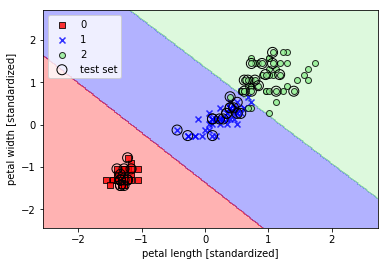

In [157]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic regression versus support vector machines

In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression has the advantage that it is a simpler model and can be implemented more easily. Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.

### Alternative implementations in scikit-learn

The scikit-learn library's `Perceptron` and `LogisticRegression` classes, which we used in the previous sections, make use of the [LIBLINEAR](http://www.csie.ntu.edu.tw/~cjlin/liblinear/) library, which is a highly optimized C/C++ library developed at the National Taiwan University . Similarly, the `SVC` class that we used to train an SVM makes use of [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/), which is an equivalent C/C++ library specialized for SVMs.

The advantage of using LIBLINEAR and LIBSVM over native Python implementations is that they allow the extremely quick training of large amounts of linear classifiers. However, sometimes our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations via the `SGDClassifier` class, which also supports online learning via the `partial_fit` method. The concept behind the `SGDClassifier` class is similar to the stochastic gradient algorithm that we implemented in Chapter 2, Training Simple Machine Learning Algorithms for Classification, for Adaline. We could initialize the stochastic gradient descent version of the perceptron, logistic regression, and a support vector machine with default parameters as follows:

In [158]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Solving nonlinear problems using a kernel SVM

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition).

Another reason why SVMs enjoy high popularity among machine learning practitioners is that it can be **easily kernelized** to solve nonlinear classification problems. Before we discuss the main concept behind a **kernel SVM**, let's first create a sample dataset to see what such a nonlinear classification problem may look like.

### Kernel methods for linearly inseparable data

Using the following code, we will create a simple dataset that has the form of an XOR gate using the `logical_or` function from NumPy, where 100 samples will be assigned the class label `1`, and 100 samples will be assigned the class label `-1`:

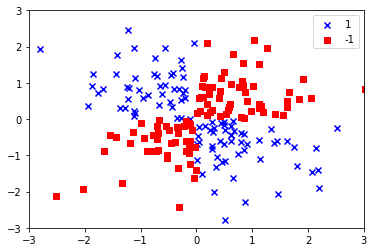

In [159]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

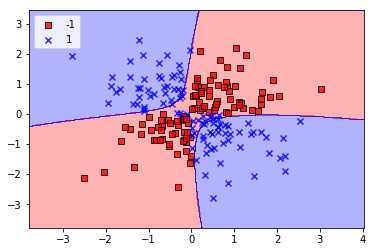

In [160]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

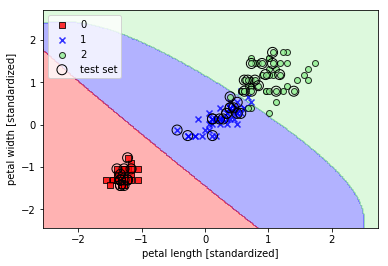

In [161]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

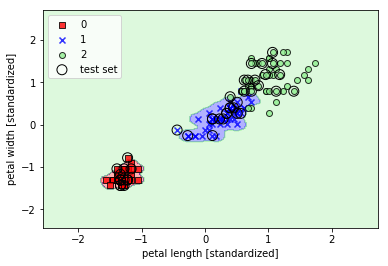

In [162]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In the resulting plot, we can now see that the decision boundary around the classes `0` and `1` is much tighter using a relatively large value of $\gamma$. Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the $\gamma$ parameter also plays an important role in controlling overfitting.

## Decision tree learning

From [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition).

Decision tree classifiers are attractive models if we care about interpretability. As the name decision tree suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples. Although the preceding figure illustrates the concept of a decision tree based on categorical variables, the same concept applies if our features are real numbers, like in the Iris dataset. For example, we could simply define a cut-off value along the sepal width feature axis and ask a binary question "Is sepal width ≥ 2.8 cm?."

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest **Information Gain (IG)**, which will be explained in more detail in the following section. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximal depth of the tree.

For a more visual comparison of the three different impurity criteria that we discussed previously, let us plot the impurity indices for the probability range [0, 1] for class 1. Note that we will also add a scaled version of the entropy (entropy / 2) to observe that the Gini impurity is an intermediate measure between entropy and the classification error. The code is as follows:

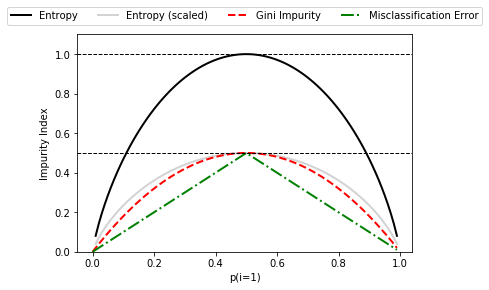

In [163]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 
                           'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray',
                           'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, 
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### Building a decision tree

Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting. Using scikit-learn, we will now train a decision tree with a maximum depth of 4, using Gini Impurity as a criterion for impurity. Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms. The code is as follows:

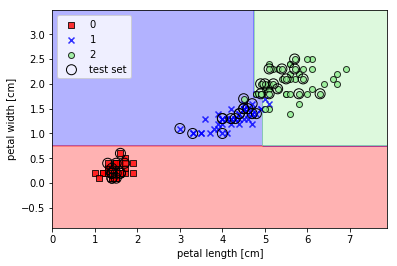

In [164]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, 
                      y_combined, 
                      classifier=tree, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### Combining multiple decision trees via random forests

**Random forests** have gained huge popularity in applications of machine learning during the last decade due to their good classification performance, scalability, and ease of use. Intuitively, a random forest can be considered as an **ensemble** of decision trees. The idea behind a random forest is to average multiple (deep) decision trees that individually suffer from high variance, to build a more robust model that has a better generalization performance and is less susceptible to overfitting. The random forest algorithm can be summarized in four simple steps:

1. Draw a random bootstrap sample of size n (randomly choose n samples from the training set with replacement).

2. Grow a decision tree from the bootstrap sample. At each node:

    a. Randomly select d features without replacement.

    b. Split the node using the feature that provides the best split according to the objective function, for instance, maximizing the information gain.

3. Repeat the steps 1-2 k times.

4. Aggregate the prediction by each tree to assign the class label by majority vote.

We should note one slight modification in step 2 when we are training the individual decision trees: instead of evaluating all features to determine the best split at each node, we only consider a random subset of those.

Although random forests don't offer the same level of interpretability as decision trees, a big advantage of random forests is that we don't have to worry so much about choosing good hyperparameter values. We typically don't need to prune the random forest since the ensemble model is quite robust to noise from the individual decision trees. The only parameter that we really need to care about in practice is the number of trees k (step 3) that we choose for the random forest. Typically, the larger the number of trees, the better the performance of the random forest classifier at the expense of an increased computational cost.

Although it is less common in practice, other hyperparameters of the random forest classifier that can be optimized—using techniques we will discuss in Chapter 5, Compressing Data via Dimensionality Reduction—are the size n of the bootstrap sample (step 1) and the number of features d that is randomly chosen for each split (step 2.1), respectively. Via the sample size n of the bootstrap sample, we control the bias-variance tradeoff of the random forest.

Decreasing the size of the bootstrap sample increases the diversity among the individual trees, since the probability that a particular training sample is included in the bootstrap sample is lower. Thus, shrinking the size of the bootstrap samples may increase the randomness of the random forest, and it can help to reduce the effect of overfitting. However, smaller bootstrap samples typically result in a lower overall performance of the random forest, a small gap between training and test performance, but a low test performance overall. Conversely, increasing the size of the bootstrap sample may increase the degree of overfitting. Because the bootstrap samples, and consequently the individual decision trees, become more similar to each other, they learn to fit the original training dataset more closely.

In most implementations, including the `RandomForestClassifier implementation in scikit-learn, the size of the bootstrap sample is chosen to be equal to the number of samples in the original training set, which usually provides a good bias-variance tradeoff. For the number of features d at each split, we want to choose a value that is smaller than the total number of features in the training set. A reasonable default that is used in scikit-learn and other implementations is $d=\sqrt{m}$, where m is the number of features in the training set.

Conveniently, we don't have to construct the random forest classifier from individual decision trees by ourselves because there is already an implementation in scikit-learn that we can use:

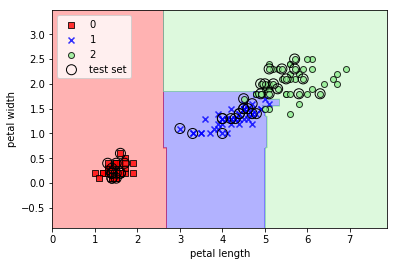

In [165]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Using the preceding code, we trained a random forest from 25 decision trees via the `n_estimators` parameter and used the entropy criterion as an impurity measure to split the nodes. Although we are growing a very small random forest from a very small training dataset, we used the `n_jobs` parameter for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer (here two cores).

## K-nearest neighbors – a lazy learning algorithm

The last supervised learning algorithm that we want to discuss in this chapter is the **k-nearest neighbor (KNN) classifier**, which is particularly interesting because it is fundamentally different from the learning algorithms that we have discussed so far.

KNN is a typical example of a **lazy learner**. It is called lazy not because of its apparent simplicity, but because it doesn't learn a discriminative function from the training data, but memorizes the training dataset instead.

### Parametric versus nonparametric models

Machine learning algorithms can be grouped into **parametric** and **nonparametric** models. Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM. In contrast, nonparametric models can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. Two examples of non-parametric models that we have seen so far are the decision tree classifier/random forest and the kernel SVM.

KNN belongs to a subcategory of nonparametric models that is described as **instance-based** learning. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:

1. Choose the number of k and a distance metric.

2. Find the k-nearest neighbors of the sample that we want to classify.

3. Assign the class label by majority vote.

Based on the chosen distance metric, the KNN algorithm finds the k samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its k nearest neighbors.

K-nearest neighbors – a lazy learning algorithm
The last supervised learning algorithm that we want to discuss in this chapter is the k-nearest neighbor (KNN) classifier, which is particularly interesting because it is fundamentally different from the learning algorithms that we have discussed so far.

KNN is a typical example of a lazy learner. It is called lazy not because of its apparent simplicity, but because it doesn't learn a discriminative function from the training data, but memorizes the training dataset instead.

Note
Parametric versus nonparametric models

Machine learning algorithms can be grouped into parametric and nonparametric models. Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Typical examples of parametric models are the perceptron, logistic regression, and the linear SVM. In contrast, nonparametric models can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. Two examples of non-parametric models that we have seen so far are the decision tree classifier/random forest and the kernel SVM.

KNN belongs to a subcategory of nonparametric models that is described as instance-based learning. Models based on instance-based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance-based learning that is associated with no (zero) cost during the learning process.

The KNN algorithm itself is fairly straightforward and can be summarized by the following steps:

Choose the number of k and a distance metric.

Find the k-nearest neighbors of the sample that we want to classify.

Assign the class label by majority vote.

The following figure illustrates how a new data point (?) is assigned the triangle class label based on majority voting among its five nearest neighbors.


Based on the chosen distance metric, the KNN algorithm finds the k samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its k nearest neighbors.

The main advantage of such a memory-based approach is that the classifier immediately adapts as we collect new training data. However, the downside is that the computational complexity for classifying new samples grows linearly with the number of samples in the training dataset in the worst-case scenario—unless the dataset has very few dimensions (features) and the algorithm has been implemented using efficient data structures such as KD-trees. An Algorithm for Finding Best Matches in Logarithmic Expected Time, J. H. Friedman, J. L. Bentley, and R.A. Finkel, ACM transactions on mathematical software (TOMS), 3(3): 209–226, 1977. Furthermore, we can't discard training samples since no training step is involved. Thus, storage space can become a challenge if we are working with large datasets.

By executing the following code, we will now implement a KNN model in scikit-learn using a Euclidean distance metric:

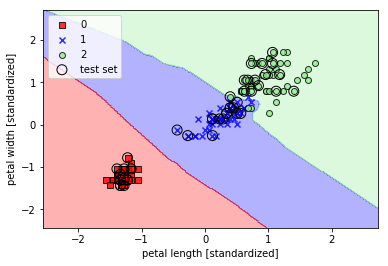

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

By specifying five neighbors in the KNN model for this dataset, we obtain a relatively smooth decision boundary.

The right choice of k is crucial to find a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. Often, a simple Euclidean distance measure is used for real-value samples, for example, the flowers in our Iris dataset, which have features measured in centimeters. However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance. The minkowski distance that we used in the previous code is just a generalization of the Euclidean and Manhattan distance. It becomes the Euclidean distance if we set the parameter p=2 or the Manhattan distance at p=1. Many other distance metrics are available in scikit-learn and can be provided to the metric parameter.

### The curse of dimensionality

It is important to mention that KNN is very susceptible to overfitting due to the curse of dimensionality. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. Intuitively, we can think of even the closest neighbors being too far away in a high-dimensional space to give a good estimate.

We have discussed the concept of regularization in the section about logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable, such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us avoid the curse of dimensionality.